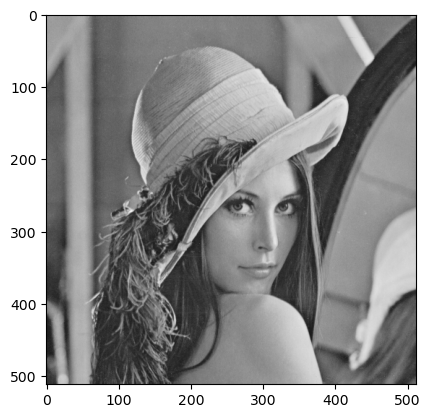

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image as img

image = cv2.imread('lena.bmp')
plt.imshow(image)
plt.show()

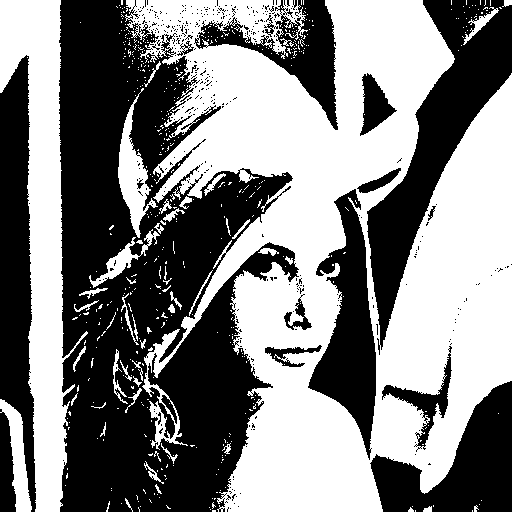

In [2]:
image = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
binarized_image = np.asarray(image)//128
img.fromarray(np.array(binarized_image,dtype='uint8')*255)

In [3]:
downsampled_image = np.zeros((64, 64), dtype=np.uint8)


for i in range(0, 512, 8):
    for j in range(0, 512, 8):
        downsampled_image[i//8, j//8] = binarized_image[i,j]
        print(binarized_image[i,j], end='')
    print()

1111111100000000111111111111111111110000011111111111100000001001
1111111100000000011111111111101011001100011111111111110000000010
1111111100000000101111111111001111111100001111111111110000001100
1111111100000000101011111101111111100000001111111111111000001000
1111111100000000011011110110000111010100001111111111111100010000
1111111100000000010010011010000010001000001111111111111100100000
1111111100000000000110100111111000011110001111111111111110000000
1111111100000000000111101111111111000000001111111111111110000000
1110111100000000000010011111111111100000001111111111111110000000
1100111100000000000000000111111111110000001111111111111100000000
1100111100000000000000000101111111111100001111011111111000000000
1000111100000000000000000101111111111110001111001111110000000001
0000111100000000000000011111111111111110001111000111110000000011
0000111100000000000000011111111111111111001111000111100000000111
0000111100000000100000111111111111111111101111000011000000001111
0000111100000000100001101

In [4]:
def h(b, c, d, e):
    if(b == c and (d != b or e != b)):
        return 'q'
    elif(b == c and (d == b and e == b)):
        return 'r'
    elif(b!=c):
        return 's'

In [5]:
top_bottom_zeros = np.zeros((downsampled_image.shape[0] + 2, downsampled_image.shape[1] + 2), dtype=downsampled_image.dtype)
top_bottom_zeros[1:-1, 1:-1] = downsampled_image

In [6]:
def f(a1,a2,a3,a4):
    if a1=='r' and a2=='r'and a3=='r'and a4=='r':
        return 5
    tmp=0
    if a1=='q':
        tmp+=1
    if a2=='q':
        tmp+=1
    if a3=='q':
        tmp+=1
    if a4=='q':
        tmp+=1
    return tmp

In [7]:
first_image = np.zeros((64, 64), dtype=int)
for i in range(1, 65):
    for j in range(1, 65):
        if top_bottom_zeros[i,j] == 1:
            a1 = h(top_bottom_zeros[i,j], top_bottom_zeros[i,j+1], top_bottom_zeros[i-1,j+1], top_bottom_zeros[i-1,j])
            a2 = h(top_bottom_zeros[i,j], top_bottom_zeros[i-1,j], top_bottom_zeros[i-1,j-1], top_bottom_zeros[i,j-1])
            a3 = h(top_bottom_zeros[i,j], top_bottom_zeros[i,j-1], top_bottom_zeros[i+1,j-1], top_bottom_zeros[i+1,j])
            a4 = h(top_bottom_zeros[i,j], top_bottom_zeros[i+1,j], top_bottom_zeros[i+1,j+1], top_bottom_zeros[i,j+1])

            first_image[i-1,j-1] = f(a1,a2,a3,a4)

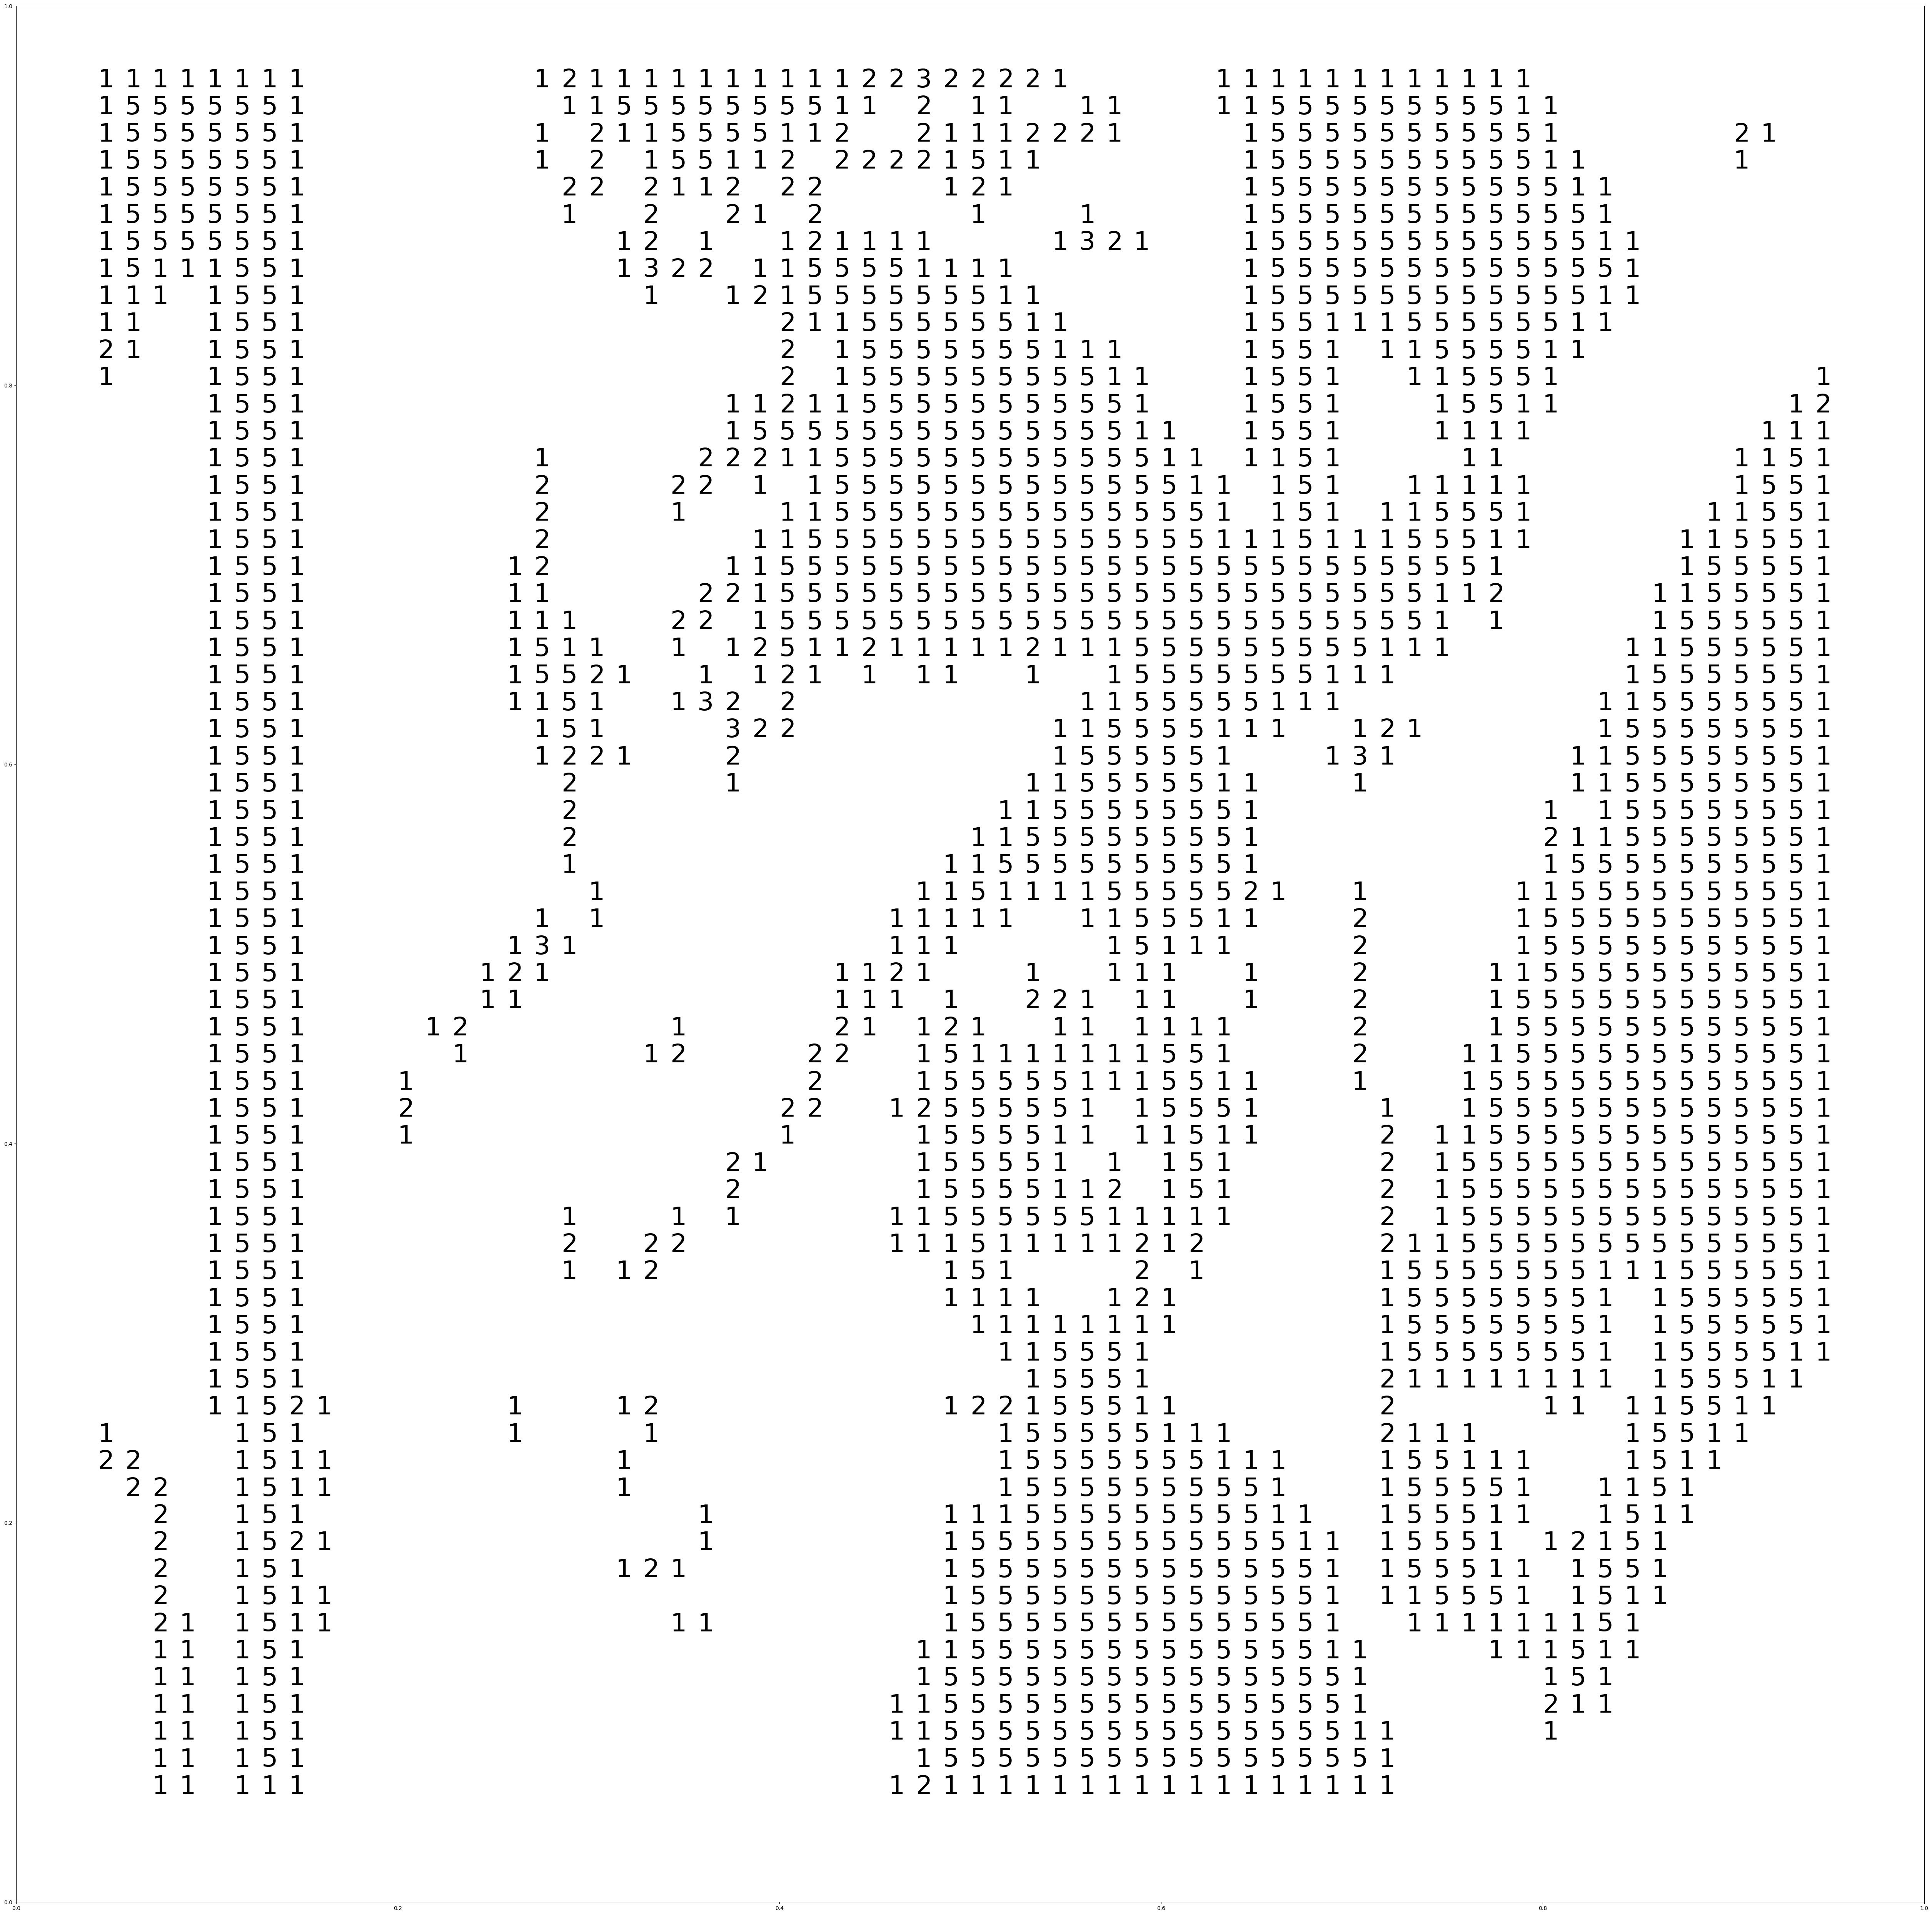

In [8]:
plt.figure(figsize=(64,64))
for i in range(64):
    for j in range(64):
        if first_image[i][j]:
            plt.text((j+3)/70,(67-i)/70,str(first_image[i][j]),fontsize=48)
plt.show()